# Trends Among Bike Sharing in Chicago, IL
## by Ahmed Aldawody

## Investigation Overview

> In this investigation, I most intersted in figuring out How long does the average trip take and how it differ based on time in term of month, week day and hour of day, as well how the type of bike and wether the user is member or not affect the duration of a trip.

## Dataset Overview

> The data consisted of Divvy's bike trip data "Chicago, IL" of the year 2020, It contains about 3541683 rows and 13 columns, The data were cleaned and sperated into two indvidual data frame one holding information about stations and the basic one holds other information about trips, features were enginered and replaced so it could be used in this analysis, by the end the data had this form:
><ul>
     <li>first called df contains 3028134 rows and 10 columns holds informations about trips</li>
     <li>stations data frame contains 1323 rows and 3 columns</li>
</ul>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [179]:
# center out plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [138]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data.csv')
stations = pd.read_csv('stations.csv')

In [139]:
monthes = ['January', 'February', 'March', 'April', 'May', 'June',
           'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.month = pd.Categorical(df.month, ordered=True, categories=monthes)
df.week_day = pd.Categorical(df.week_day, ordered=True, categories=days)

df.dtypes

rideable_type         object
start_station_id      object
end_station_id        object
is_member               bool
duration             float64
month               category
month_day              int64
week_day            category
hour                   int64
distance             float64
dtype: object

## Distribution of Trip Durations

> Trip durations in the dataset take on a large range of values, from about 2 minute at the lowest, to about 160 minutes at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on approximately normal with a slight right skew shape.

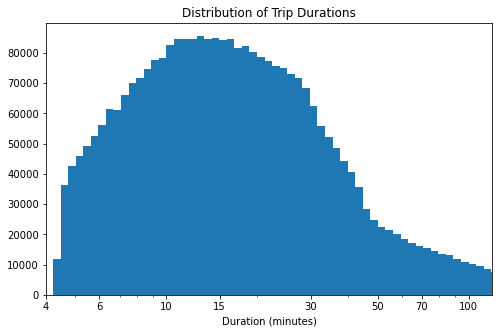

In [180]:
plt.figure(figsize=[8,5])

binsize=.025
bins = 10** np.arange(0, np.log(df.duration.max()) + binsize, binsize)

plt.hist(df['duration'], bins=bins)

plt.xscale('log')
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Trip Durations')

xticks=[4, 6, 10, 15, 30, 50, 70, 100]
plt.xticks(xticks, xticks)
plt.xlim([4, 120])
plt.show();

## Trip Counts per Day Part

>Most of trips are at Afternoon and the least at Night.

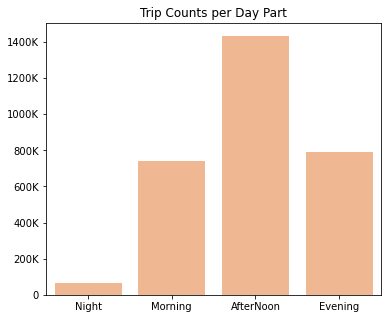

In [181]:
bins = [0,4,11,17,23]
labels = ['Night', 'Morning','AfterNoon','Evening']

day_parts = pd.DataFrame(pd.cut(df['hour'], bins=bins, labels=labels, include_lowest=True))


plt.figure(figsize=[6,5])

sb.countplot(data=day_parts, x='hour', color=sb.color_palette("pastel")[1])


plt.xlabel('')
plt.ylabel('')

yticks=np.arange(0, int(15e5), int(2e5))
yticks_labels = np.concatenate(([0], [f'{int(x/1000)}K' for x in yticks[1:]]))

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.yticks(yticks, yticks_labels)

plt.title('Trip Counts per Day Part')

plt.show();

## Trip Counts per Day

>Trip counts tend to increase towards weekend

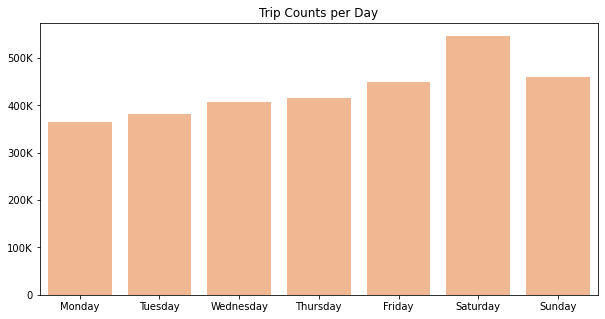

In [182]:
plt.figure(figsize=[10,5])

sb.countplot(data=df, x='week_day', color=sb.color_palette("pastel")[1])


plt.xlabel('')
plt.ylabel('')

yticks=np.arange(0, int(6e5), int(1e5))
yticks_labels = np.concatenate(([0], [f'{int(x/1000)}K' for x in yticks[1:]]))

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.yticks(yticks, yticks_labels)

plt.title('Trip Counts per Day')

plt.show();

## Trip Counts per Month

>Trips counts increases a lot in summer months especially from July to September, It Could be because of the weather "tribs are less in cold days".

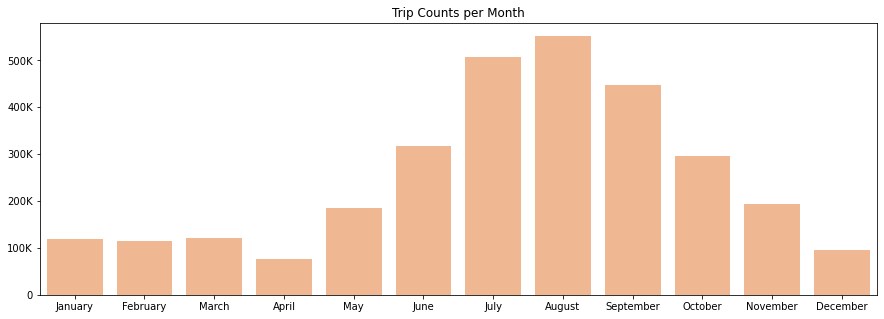

In [183]:
plt.figure(figsize=[15,5])

sb.countplot(data=df, x='month', color=sb.color_palette("pastel")[1])


plt.xlabel('')
plt.ylabel('')

yticks=np.arange(0, int(6e5), int(1e5))
yticks_labels = np.concatenate(([0], [f'{int(x/1000)}K' for x in yticks[1:]]))

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.yticks(yticks, yticks_labels)

plt.title('Trip Counts per Month')

plt.show();

## Percentage of Rider Types

>About 60% of trips in the dataset were by members.

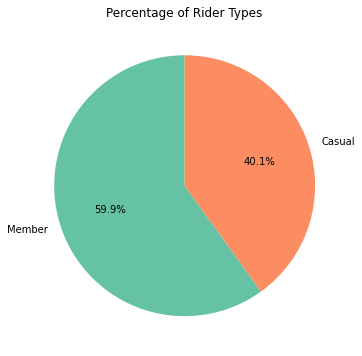

In [184]:
counts = (df.is_member.value_counts())

fig = plt.figure(figsize=[6, 6])
style = plt.get_cmap('Set2').colors
plt.pie(counts, labels=['Member', 'Casual'], autopct='%1.1f%%', colors=style, startangle=90)
plt.title('Percentage of Rider Types')
plt.show();

## Percentage of Bike Types
>About 88% of trips in the dataset were by docked bikes, 10% electric bikes and 2% classic bikes.

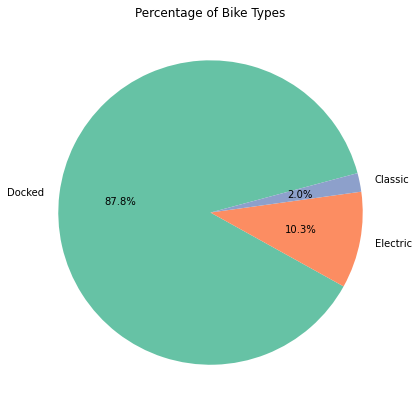

In [185]:
counts = (df.rideable_type.value_counts())

fig = plt.figure(figsize=[7, 7])
style = plt.get_cmap('Set2').colors
plt.pie(counts, labels=['Docked', 'Electric', 'Classic'], autopct='%1.1f%%', colors=style, startangle=15)
plt.title('Percentage of Bike Types')
plt.show();

## Trip Duration per Rider Type

>Casual riders have higher average duration in their trips than members.

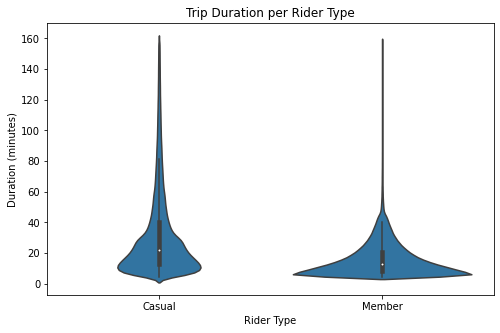

In [186]:
color = sb.color_palette()[0]

plt.figure(figsize=[8, 5])

sb.violinplot(data=df, x='is_member' , y='duration' , color=color)

plt.title('Trip Duration per Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Duration (minutes)')
plt.xticks(np.arange(2), ['Casual', 'Member'])
plt.show();

## Trip Duration per Month

>Summer Months have longer rides.

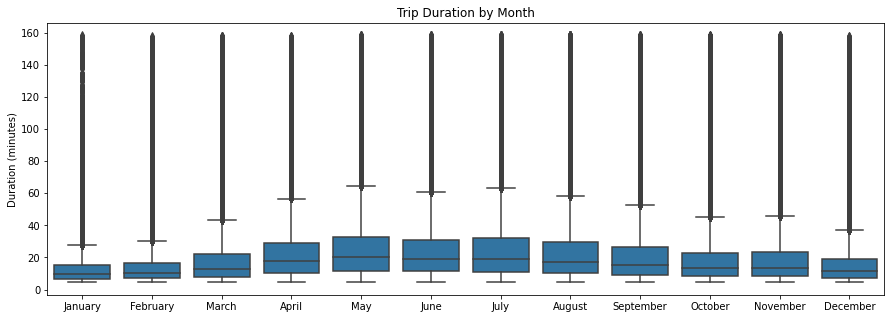

In [187]:
plt.figure(figsize=[15, 5])

sb.boxplot(data=df, x='month' , y='duration' , color=color)

plt.title('Trip Duration by Month')
plt.xlabel('')
plt.ylabel('Duration (minutes)')
plt.show();

## Trip Duration per Bike & Rider Types

>Casual bikers riding docked bikes have the most trip duration in average.

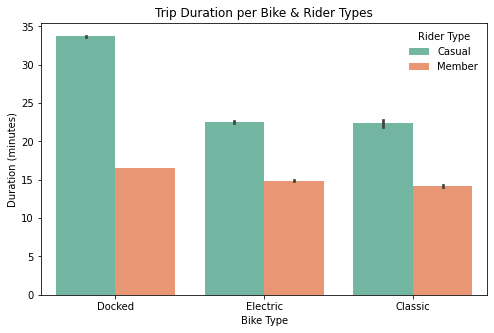

In [188]:
fig, ax = plt.subplots(figsize=[8,5])

sb.barplot(data=df, x ='rideable_type', y ='duration', hue ='is_member',
           palette=sb.color_palette("Set2"))

plt.xticks(np.arange(3), ['Docked', 'Electric', 'Classic'])

plt.xlabel('Bike Type')
plt.ylabel('Duration (minutes)')

plt.title('Trip Duration per Bike & Rider Types')

handles, l = ax.get_legend_handles_labels()
ax.legend(handles, ['Casual', 'Member'], title='Rider Type', frameon=False)
plt.show();

## Trip Duration per Month by Rider & Bike Types

>At the first half of the year till June ther is no use of electeric and classic bikes, Starting from july electric bikes starts to apper with average duratoin less than docked, probably becaue The demand of bikes usage is increasing in summer and docked bikes not covering that demand, However in December riders start to us classic bike even if the demand of bikes usage is much less than summer monthes.

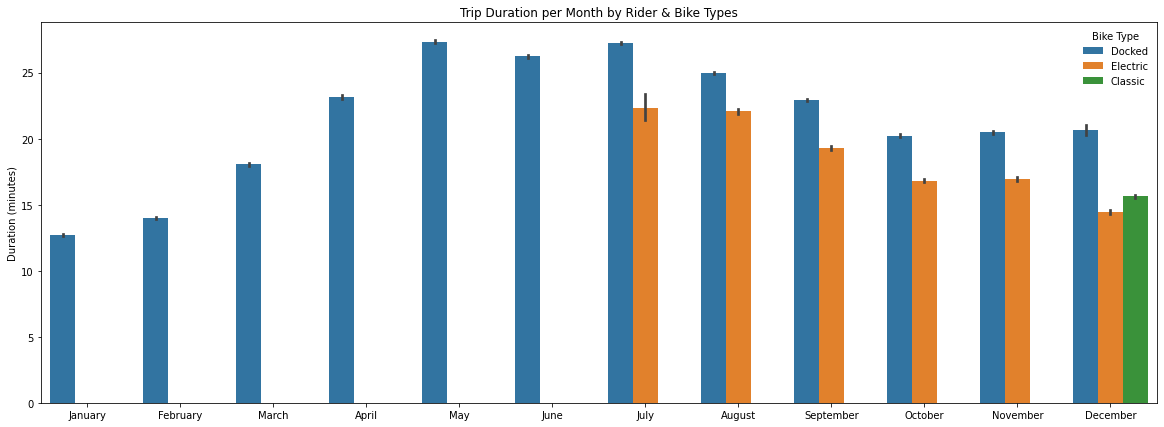

In [189]:
fig, ax = plt.subplots(figsize=[20,7])

sb.barplot(data = df, x = 'month', y = 'duration', hue = 'rideable_type')


plt.xlabel('')
plt.ylabel('Duration (minutes)')

plt.title('Trip Duration per Month by Rider & Bike Types')

handles, l = ax.get_legend_handles_labels()
ax.legend(handles, ['Docked', 'Electric', 'Classic'], title='Bike Type', frameon=False)

plt.show();